<a href="https://colab.research.google.com/github/SwatiPandeShukla/log_reg_assignment/blob/main/swati_shukla_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
training_bene_data = pd.read_csv('Train_Beneficiarydata-1542865627584.csv')
training_in_data = pd.read_csv('Train_Inpatientdata-1542865627584.csv')
training_out_data = pd.read_csv('Train_Outpatientdata-1542865627584.csv')
training_fraud_data = pd.read_csv('Train-1542865627584.csv')

In [3]:
# Concat training_in_data and training_out_data
merged_training_data = pd.concat([training_in_data, training_out_data], ignore_index=True)

In [4]:
# Merge the merged_training_data with training_bene_data on 'BeneID' with an outer left join
merged_training_data = pd.merge(merged_training_data, training_bene_data, on='BeneID', how='left')

In [5]:
# Merge the merged_training_data with training_fraud_data on 'Provider'
merged_training_data = pd.merge(merged_training_data, training_fraud_data, on='Provider')
merged_training_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,2,1,1,36000,3204,60,70,No
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,2,1,1,36000,3204,60,70,No
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,2,2,1,1,5000,1068,250,320,No
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,2,1,2,2,2,21260,2136,120,100,No


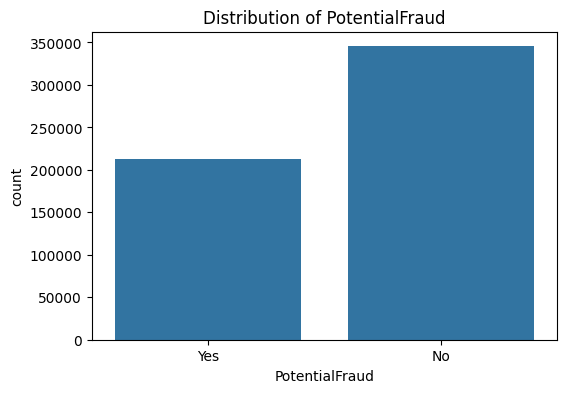

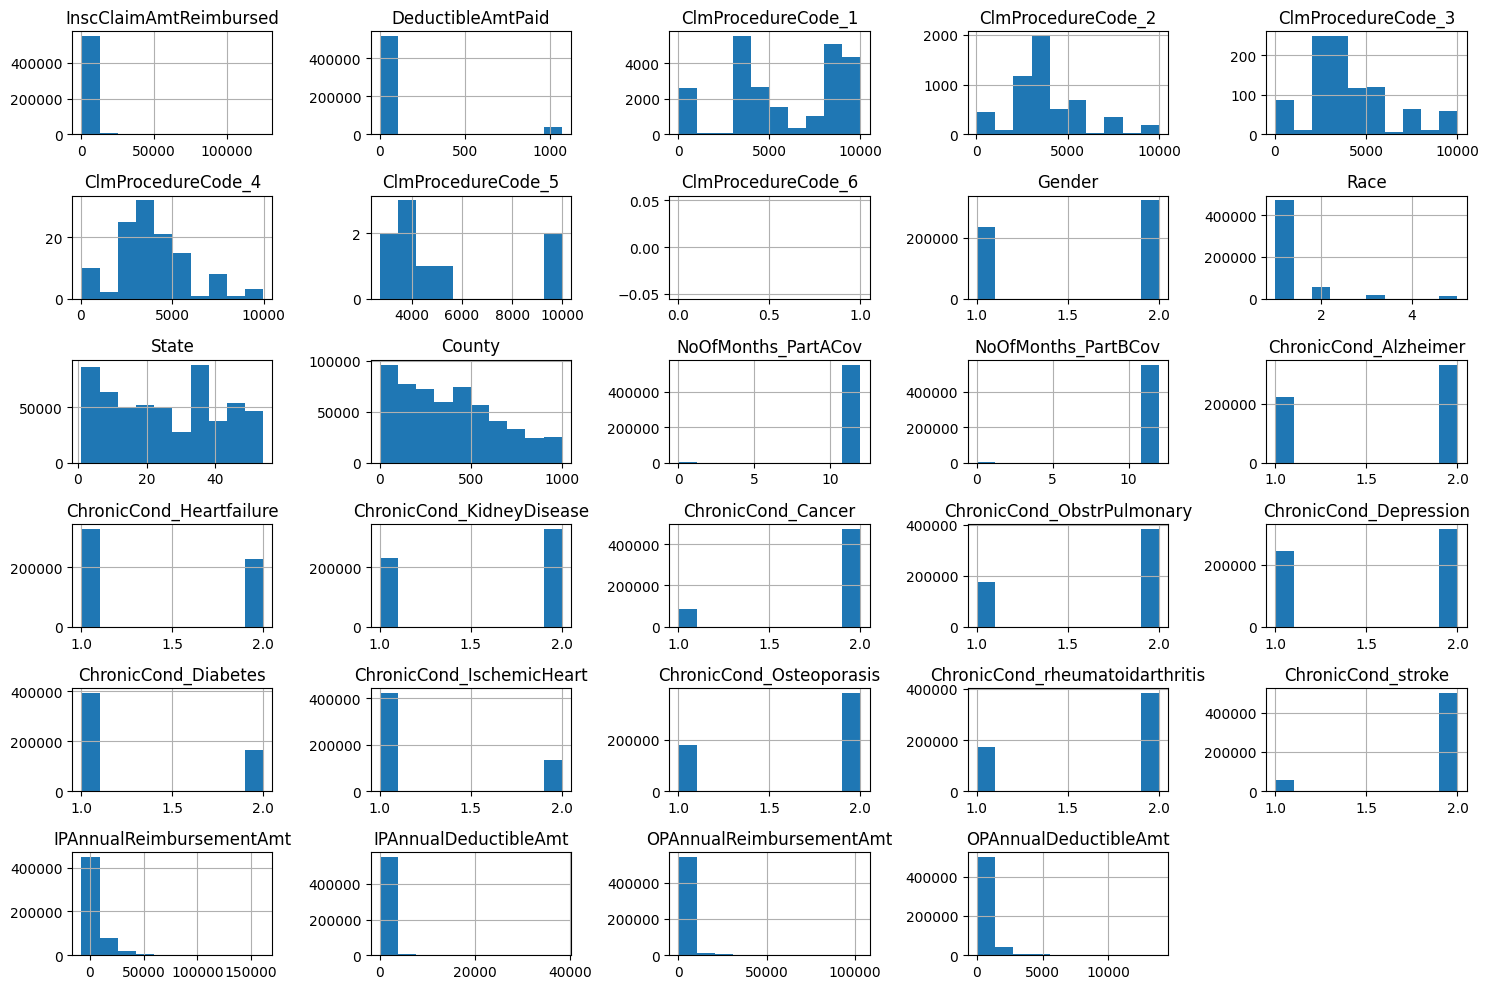

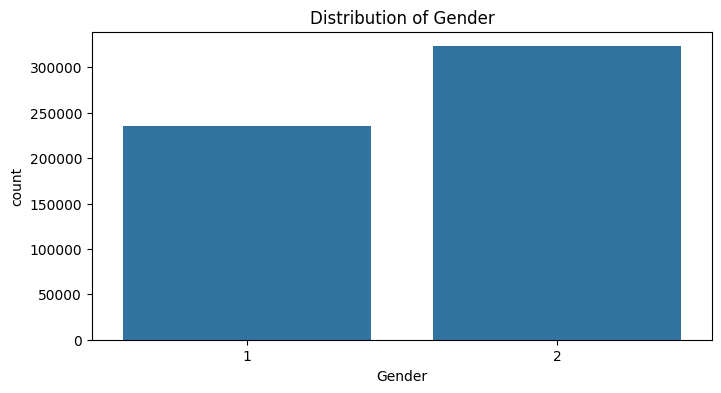

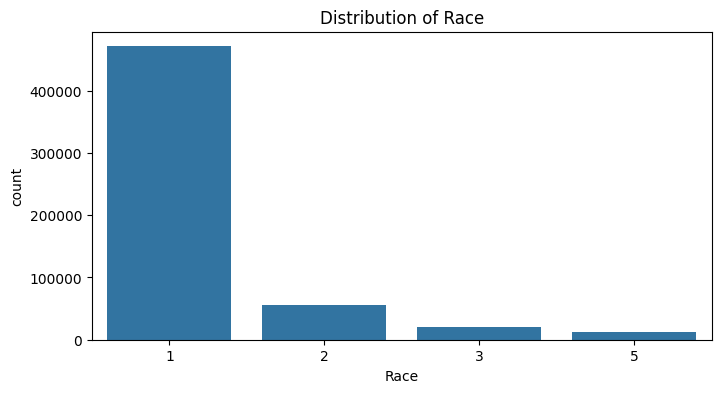

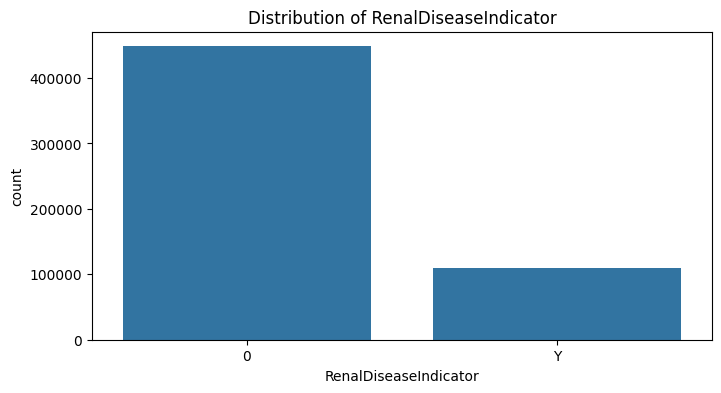

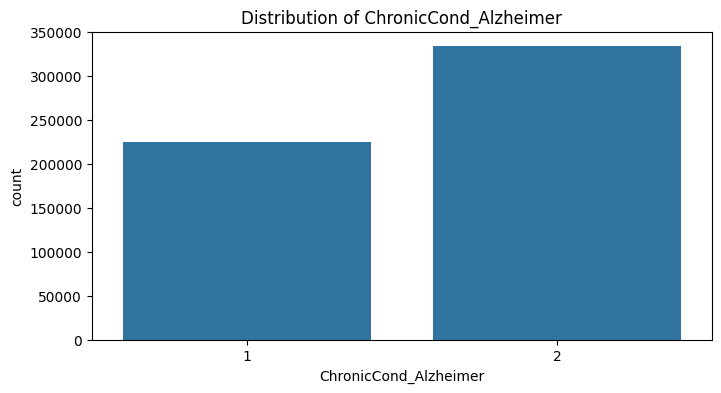

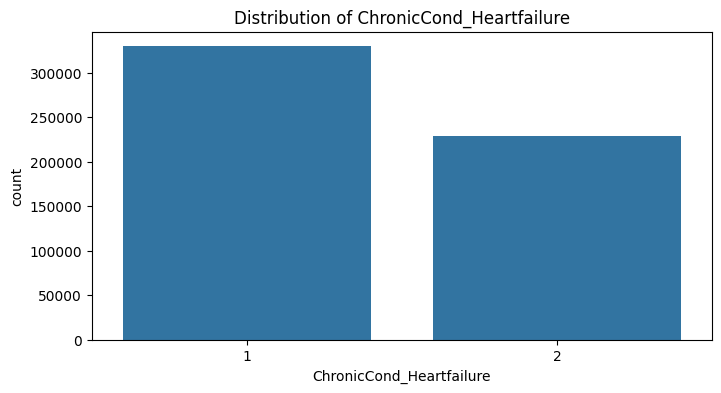

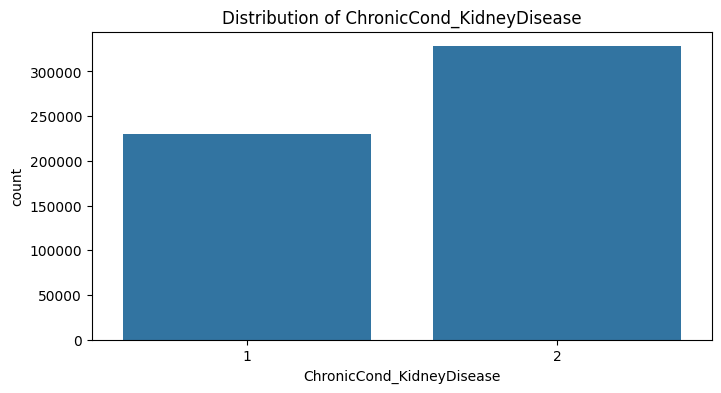

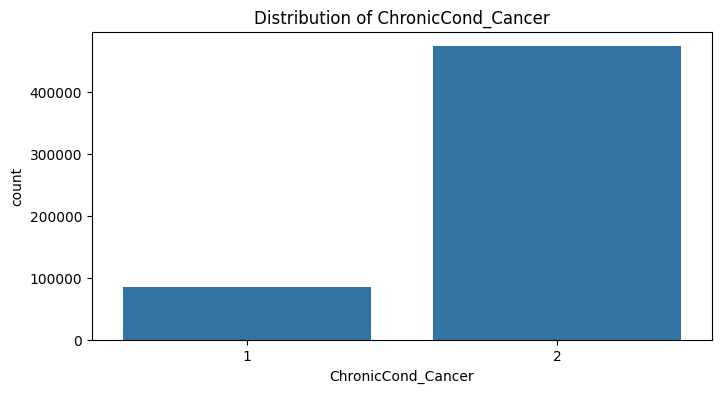

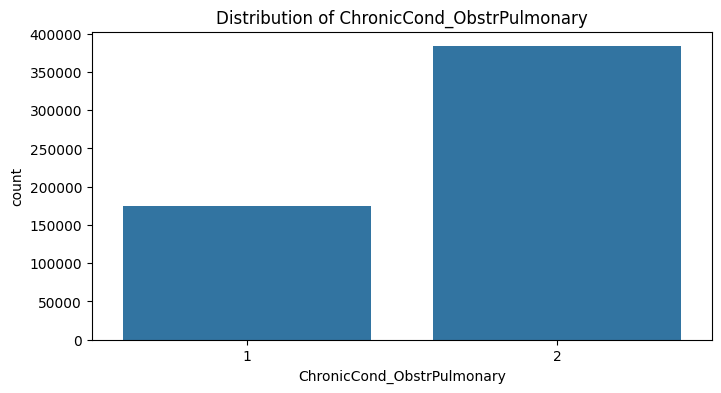

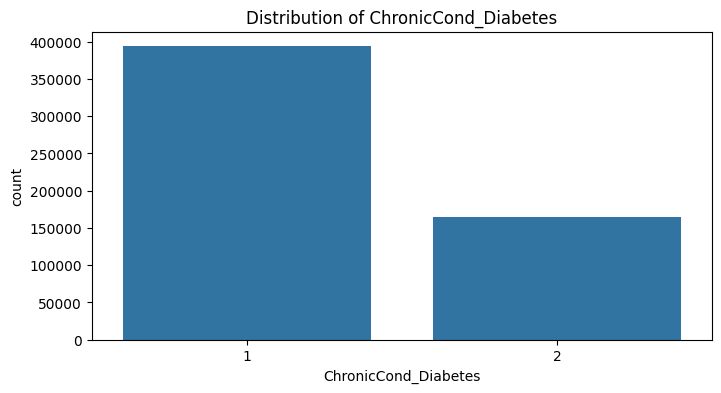

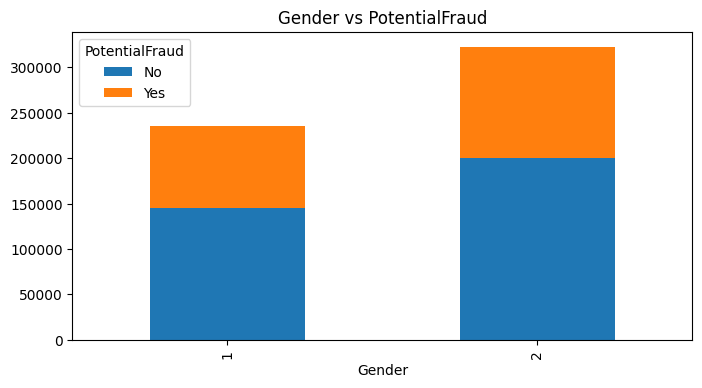

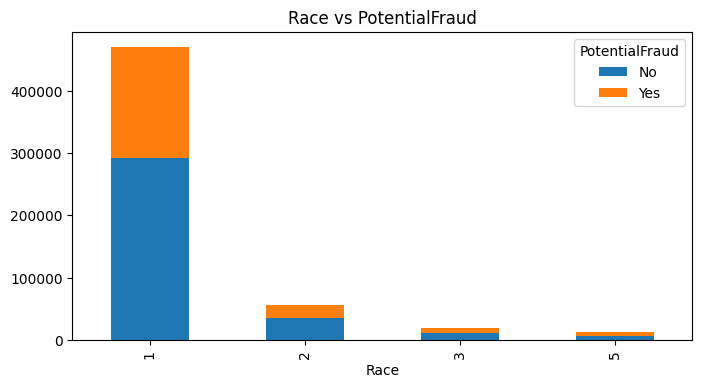

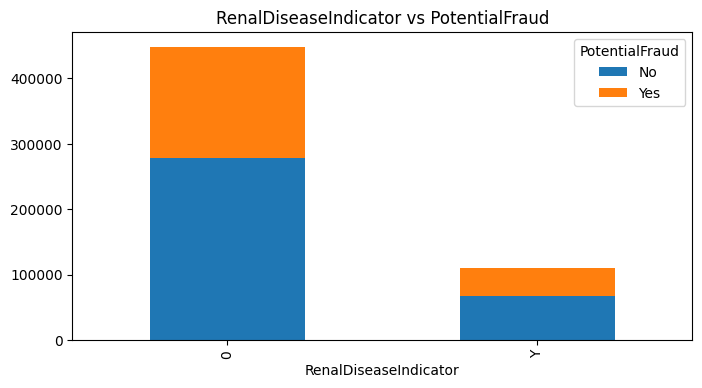

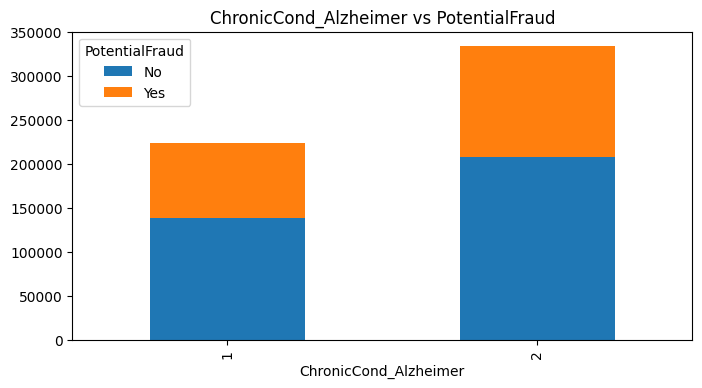

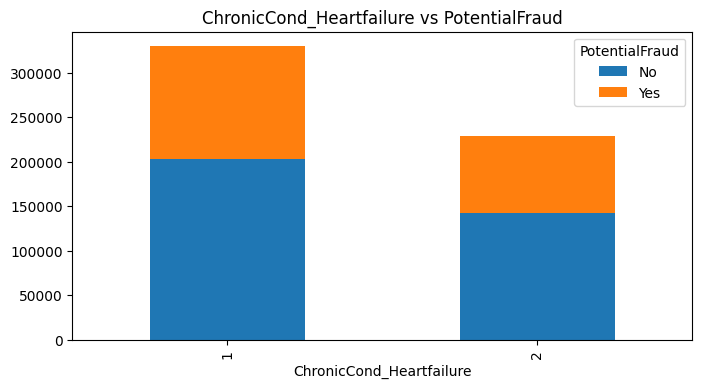

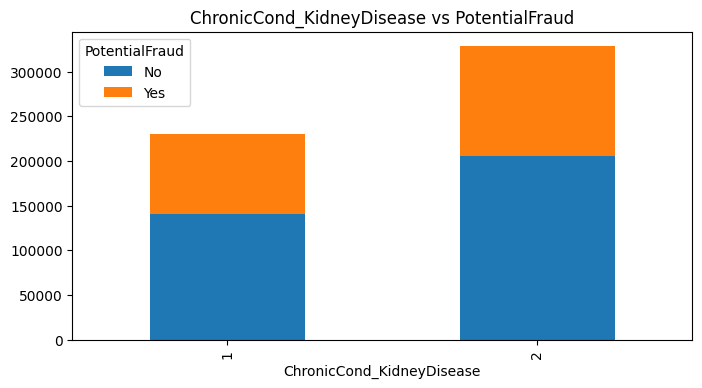

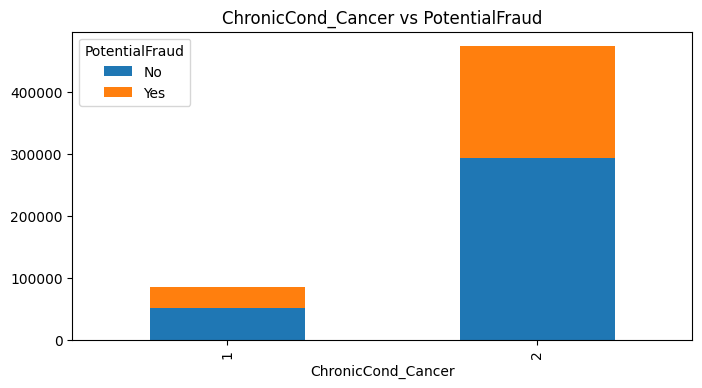

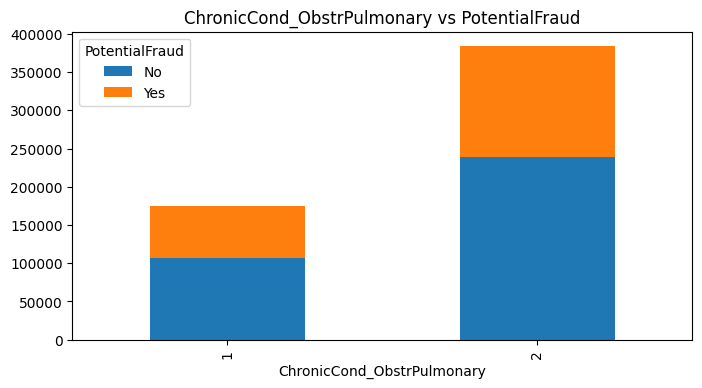

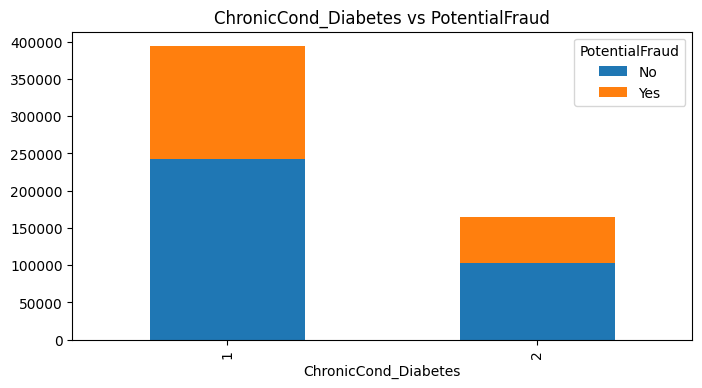

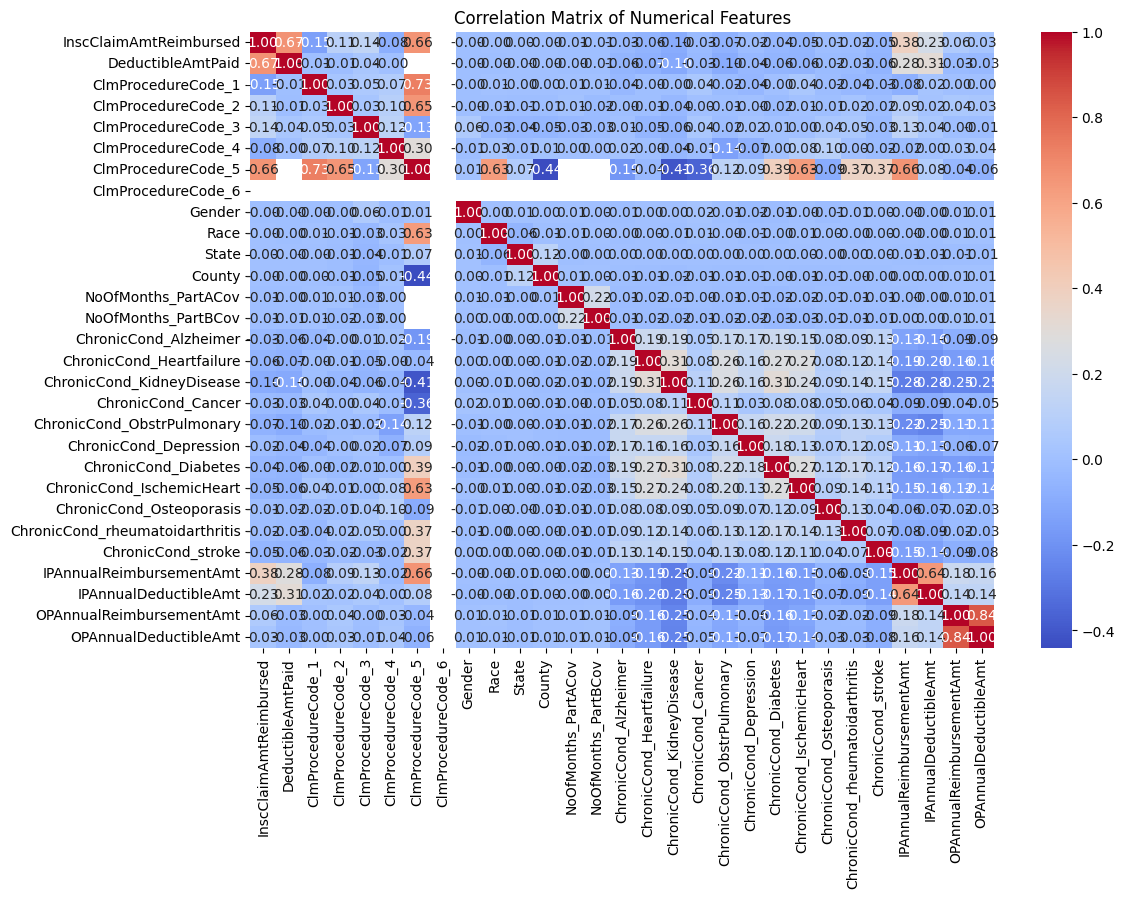

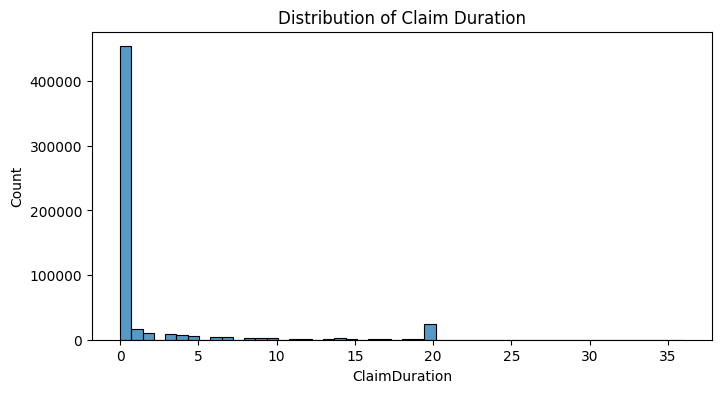

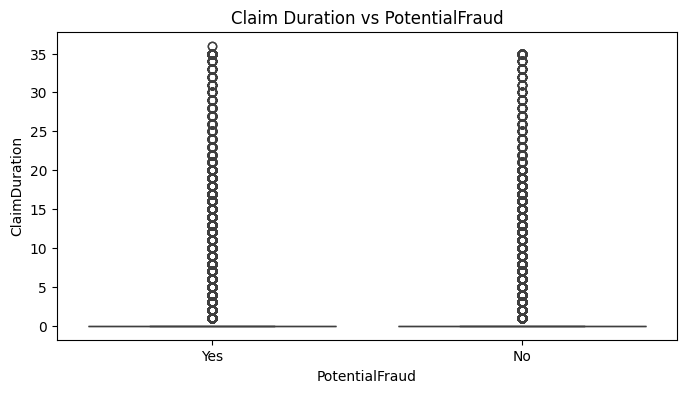


Top Providers by Claim Count and their Fraud Rate:
PotentialFraud   No  Yes  TotalClaims
Provider                             
PRV51459        0.0  1.0         8240
PRV53797        0.0  1.0         4739
PRV51574        0.0  1.0         4444
PRV53918        0.0  1.0         3588
PRV54895        0.0  1.0         3436


In [6]:
# Check the distribution of the target variable ('PotentialFraud')
plt.figure(figsize=(6, 4))
sns.countplot(x='PotentialFraud', data=merged_training_data)
plt.title('Distribution of PotentialFraud')
plt.show()

# Analyze numerical columns
numerical_cols = merged_training_data.select_dtypes(include=np.number).columns
merged_training_data[numerical_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Analyze categorical columns (can be many, let's pick a few potentially interesting ones)
categorical_cols = ['Gender', 'Race', 'RenalDiseaseIndicator', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Osteoporrs', 'ChronicCond_Arthritis', 'ChronicCond_Diabetes']
for col in categorical_cols:
    if col in merged_training_data.columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(x=col, data=merged_training_data)
        plt.title(f'Distribution of {col}')
        plt.show()


# Relationship between PotentialFraud and categorical features (using cross-tabulation and bar plots)
for col in categorical_cols:
    if col in merged_training_data.columns:
        ct = pd.crosstab(merged_training_data[col], merged_training_data['PotentialFraud'])
        ct.plot(kind='bar', stacked=True, figsize=(8, 4))
        plt.title(f'{col} vs PotentialFraud')
        plt.show()

# Correlation heatmap for numerical columns
plt.figure(figsize=(12, 8))
sns.heatmap(merged_training_data[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Further analysis on date columns if needed (e.g., converting to datetime and extracting features)
# Example: Convert claim start and end dates
merged_training_data['ClaimStartDt'] = pd.to_datetime(merged_training_data['ClaimStartDt'], errors='coerce')
merged_training_data['ClaimEndDt'] = pd.to_datetime(merged_training_data['ClaimEndDt'], errors='coerce')
merged_training_data['ClaimDuration'] = (merged_training_data['ClaimEndDt'] - merged_training_data['ClaimStartDt']).dt.days

# Analyze ClaimDuration
plt.figure(figsize=(8, 4))
sns.histplot(merged_training_data['ClaimDuration'].dropna(), bins=50)
plt.title('Distribution of Claim Duration')
plt.show()

# Relationship between ClaimDuration and PotentialFraud
plt.figure(figsize=(8, 4))
sns.boxplot(x='PotentialFraud', y='ClaimDuration', data=merged_training_data)
plt.title('Claim Duration vs PotentialFraud')
plt.show()

# Provider counts and their relationship with fraud
provider_fraud_counts = merged_training_data.groupby('Provider')['PotentialFraud'].value_counts(normalize=True).unstack().fillna(0)
provider_fraud_counts['TotalClaims'] = merged_training_data['Provider'].value_counts()
provider_fraud_counts = provider_fraud_counts.sort_values(by='TotalClaims', ascending=False)

# Display top providers by claim count and their fraud rate
print("\nTop Providers by Claim Count and their Fraud Rate:")
print(provider_fraud_counts.head())

# You can continue to explore relationships between other features and 'PotentialFraud'
# e.g., Patient location, diagnosis codes, procedure codes, etc.
# Note: The diagnosis and procedure codes might require more sophisticated analysis due to their nature (multiple codes per claim).

In [7]:
# Feature Engineering
# Handle Missing Values
# For simplicity, let's fill numerical NaNs with the mean and categorical NaNs with the mode.
# You might need more sophisticated imputation strategies depending on the features.
for col in merged_training_data.columns:
    if merged_training_data[col].isnull().sum() > 0:
        if merged_training_data[col].dtype in ['int64', 'float64']:
            merged_training_data[col].fillna(merged_training_data[col].mean(), inplace=True)
        else:
            merged_training_data[col].fillna(merged_training_data[col].mode()[0], inplace=True)

print("\nMissing values after imputation:")
print(merged_training_data.isnull().sum())

# Encode Categorical Features
# Use one-hot encoding for features with multiple categories and label encoding for binary features.
merged_training_data['PotentialFraud'] = merged_training_data['PotentialFraud'].map({'No': 0, 'Yes': 1})
merged_training_data['RenalDiseaseIndicator'] = merged_training_data['RenalDiseaseIndicator'].map({'0': 0, 'Y': 1}) # Assuming '0' and 'Y' are the values

# For other categorical columns, use one-hot encoding.
# Exclude columns that are identifiers or dates already processed.
categorical_cols_for_ohe = ['Gender', 'Race'] # Add other suitable categorical columns

# Check if the columns exist before applying one-hot encoding
categorical_cols_for_ohe = [col for col in categorical_cols_for_ohe if col in merged_training_data.columns]

merged_training_data = pd.get_dummies(merged_training_data, columns=categorical_cols_for_ohe, drop_first=True)

# Create Age feature
# Assuming 'DOB' and 'DOD' are available and are datetime objects
# Convert to datetime if not already done
merged_training_data['DOB'] = pd.to_datetime(merged_training_data['DOB'], errors='coerce')
merged_training_data['DOD'] = pd.to_datetime(merged_training_data['DOD'], errors='coerce')

# Calculate age at the time of the claim start or end, or at a reference date
# Using claim start date as a reference
merged_training_data['Age'] = ((merged_training_data['ClaimStartDt'] - merged_training_data['DOB']).dt.days / 365.25).astype(int)

# Handle cases where DOD is before ClaimEndDt - calculate age at death
merged_training_data['Age_at_Death'] = np.where(merged_training_data['DOD'] < merged_training_data['ClaimEndDt'],
                                                ((merged_training_data['DOD'] - merged_training_data['DOB']).dt.days / 365.25).astype(int),
                                                merged_training_data['Age']) # Use calculated Age if no death during claim

# Use Age_at_Death as the primary age feature, or handle the logic appropriately
merged_training_data['Age'] = merged_training_data['Age_at_Death']
merged_training_data.drop('Age_at_Death', axis=1, inplace=True)

# Interaction features (example: interaction between claim duration and total claim amount)
merged_training_data['ClaimDuration_x_InscClaimAmtReimbursed'] = merged_training_data['ClaimDuration'] * merged_training_data['InscClaimAmtReimbursed']

# Feature Selection
# Drop original date columns, identifiers, and columns that might not be useful
# Identify columns to drop based on previous analysis and domain knowledge
columns_to_drop = ['BeneID', 'ClaimID', 'Provider', 'ClaimStartDt', 'ClaimEndDt', 'DOB', 'DOD', 'State', 'County', 'AttendingPhysician'] # Add other less useful columns if any

# Check if the columns exist before dropping
columns_to_drop = [col for col in columns_to_drop if col in merged_training_data.columns]
merged_training_data.drop(columns=columns_to_drop, inplace=True)

# Dropping highly correlated features might remove important information.
# Let's skip dropping based on high correlation for now, but keep it in mind.
# merged_training_data.drop(columns=to_drop_high_corr, inplace=True)

# You can also use feature importance from a model (like tree-based models) for selection.
# This is typically done after splitting the data into training and testing sets.

# Display the first few rows of the engineered and selected features
merged_training_data.info()

/tmp/ipython-input-7-3537375278.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_training_data[col].fillna(merged_training_data[col].mode()[0], inplace=True)
/tmp/ipython-input-7-3537375278.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c


Missing values after imputation:
BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                      0
OperatingPhysician                      0
OtherPhysician                          0
AdmissionDt                             0
ClmAdmitDiagnosisCode                   0
DeductibleAmtPaid                       0
DischargeDt                             0
DiagnosisGroupCode                      0
ClmDiagnosisCode_1                      0
ClmDiagnosisCode_2                      0
ClmDiagnosisCode_3                      0
ClmDiagnosisCode_4                      0
ClmDiagnosisCode_5                      0
ClmDiagnosisCode_6                      0
ClmDiagnosisCode_7                      0
ClmDiagnosisCode_8                      0
ClmDiagnosisCode_9                      0


In [8]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Feature Selection - Drop columns here BEFORE defining X and y
# Identify columns to drop based on previous analysis and domain knowledge
# Ensure 'Provider' is included in the list of columns to drop
columns_to_drop = ['BeneID', 'ClaimID', 'Provider', 'ClaimStartDt', 'ClaimEndDt', 'DOB', 'DOD', 'State', 'County', 'AttendingPhysician']

# Check if the columns exist before dropping
columns_to_drop = [col for col in columns_to_drop if col in merged_training_data.columns]
merged_training_data.drop(columns=columns_to_drop, inplace=True)

# Separate features (X) and target (y)
# Now 'Provider' is dropped from merged_training_data, so it won't be in X
X = merged_training_data.drop(columns='PotentialFraud', axis=1)
y = merged_training_data['PotentialFraud']

# Initialize the base model (e.g., Logistic Regression)
model = LogisticRegression() # Use liblinear solver for small to medium datasets

rfe_selector = RFE(estimator= model, n_features_to_select=15, step=1)

In [15]:
training_final_data = rfe_selector.fit_transform(X, y)

ValueError: could not convert string to float: 'PHY330576'